In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics

import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    names = ["s_length", "s_width", "p_length", "p_width", "class"]
)
print(df.shape)
df.head()

(150, 5)


,s_length,s_width,p_length,p_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,s_length,s_width,p_length,p_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df_norm = df[['s_length', 's_width', 'p_length', 'p_width']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.head()

,s_length,s_width,p_length,p_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [5]:
df_norm.describe()

,s_length,s_width,p_length,p_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [6]:
target = df[['class']]
df = pd.concat([df_norm, target], axis=1)
df.head()

,s_length,s_width,p_length,p_width,class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

### Decision Tree Default

In [8]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.feature_importances_

array([0.02285714, 0.        , 0.95877551, 0.01836735])

Treinando e predizendo com a base de dados Iris

In [9]:
prediction = clf.predict(X_test)
metrics.accuracy_score(prediction, y_test)

0.9111111111111111

#### Verificando a árvore gerada com os parâmetros default

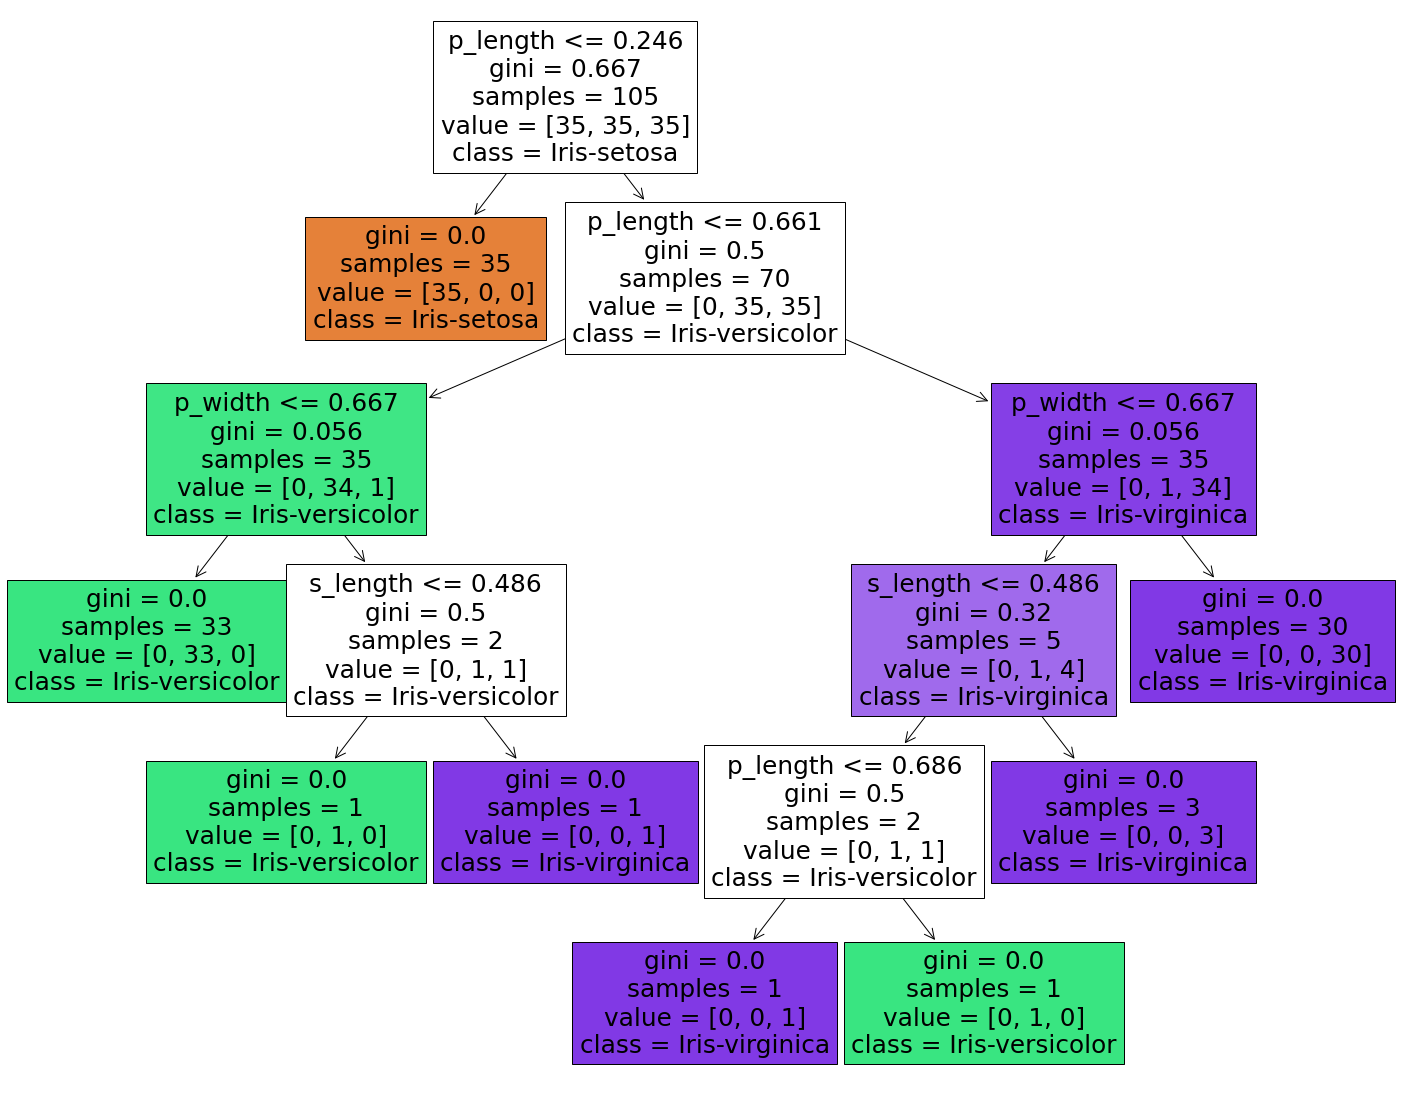

In [10]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=df.drop('class', axis=1).columns,  
                   class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                   filled=True)

### Setando parâmetros para a Decision Tree

In [16]:
# Renderizando a árvore de forma interativa:
from ipywidgets import interactive
from IPython.display import SVG, display
from graphviz import Source

# feature labels
features_label = df.drop('class', axis=1).columns

# class label
class_label = df["class"].unique()

def plot_tree(depth):
    estimator = DecisionTreeClassifier(
        random_state=0,
        max_depth=depth,
        min_samples_split=5,
        min_samples_leaf=5
    )
    estimator.fit(X_train, y_train)
    
    print("Acurácia: ", metrics.accuracy_score(estimator.predict(X_test), y_test))
    
    graph = Source(
        export_graphviz(
            estimator,
            out_file=None,
            feature_names=features_label,
            class_names=class_label,
            impurity=True,
            filled=True
        )
    )
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree, depth=[1, 2, 3, 4, 5])

display(inter)

interactive(children=(Dropdown(description='depth', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_classes…